In [13]:
# import pandas as pd

# all_features = pd.read_csv('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트2/data/윈저라이징_inf제거.csv',index_col=0)

# # Display the first few rows of the dataset to understand its structure
# all_features


In [14]:
# all_features.info()

In [15]:
# all_features = all_features.drop(columns = ['코스닥연수익률 (%)', '코스피연수익률(%)','코스닥변동성', '코스피변동성'])

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns

# 파일을 읽기
all_features = pd.read_csv('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트2/data/윈저라이징_inf제거.csv',index_col=0)
all_features = all_features.drop(columns = ['코스닥연수익률 (%)', '코스피연수익률(%)','코스닥변동성', '코스피변동성'])
all_features

,회사명,거래소코드,회계년도,총자본증가율,정상영업이익증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,매출액총이익률,...,실업률,외환보유액(천달러),CD이자율,환율,수출물가지수증감률,수입물가지수증감률,3년국고채수익률,생산자물가지수,생산자물가지수증감률,부실
0,(주)ES큐브,50120,2012,-16.575097,0.0,92.510776,1.564118,4.854248,-0.4200,28.015517,...,3.1,316897731,2.89,1070.6,-2.367798,-0.724218,2.820,103.31,0.692008,0.0
1,(주)ES큐브,50120,2013,1.849357,0.0,-1427.915750,6.304012,4.692085,-53.5257,24.759975,...,3.2,335647450,2.66,1055.4,-4.268391,-7.917155,2.858,101.66,-1.597135,0.0
2,(주)ES큐브,50120,2014,20.099174,0.0,96.260255,17.123515,-24.126991,-53.5257,21.419545,...,3.6,353600472,2.13,1099.3,-5.961831,-8.166371,2.098,101.12,-0.531182,0.0
3,(주)ES큐브,50120,2015,-1.751499,0.0,-274.898482,0.053133,-5.188115,44.4400,27.803407,...,3.5,358513845,1.67,1172.5,-5.217313,-18.112831,1.662,97.06,-4.015032,0.0
4,(주)ES큐브,50120,2016,89.076046,0.0,1033.661139,44.390095,-18.654872,-23.0800,28.682162,...,3.4,361701404,1.52,1207.7,-3.297016,-4.409925,1.638,95.30,-1.813311,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12317,한화화인케미칼(주),25850,2013,0.000000,0.0,0.000000,0.000000,0.000000,-6.8600,-18.891623,...,3.2,335647450,2.66,1055.4,-4.268391,-7.917155,2.858,101.66,-1.597135,1.0
12318,핸즈코퍼레이션(주),143210,2022,-3.617503,0.0,-21.656986,-25.683177,38.426889,-24.2500,4.960248,...,3.0,399043064,3.98,1264.5,16.641876,20.573937,3.722,115.29,8.375635,1.0
12319,현대로템(주),64350,2015,14.613589,0.0,-1427.915750,-17.312414,3.698453,-1.4100,-0.362243,...,3.5,358513845,1.67,1172.5,-5.217313,-18.112831,1.662,97.06,-4.015032,1.0
12320,현대페인트(주),11720,2012,0.000000,0.0,0.000000,0.000000,0.000000,-1.4500,22.162032,...,3.1,316897731,2.89,1070.6,-2.367798,-0.724218,2.820,103.31,0.692008,1.0


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_10332\1727931110.py:23: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7913.
  shapiro_0 = shapiro(group0_train[feature])


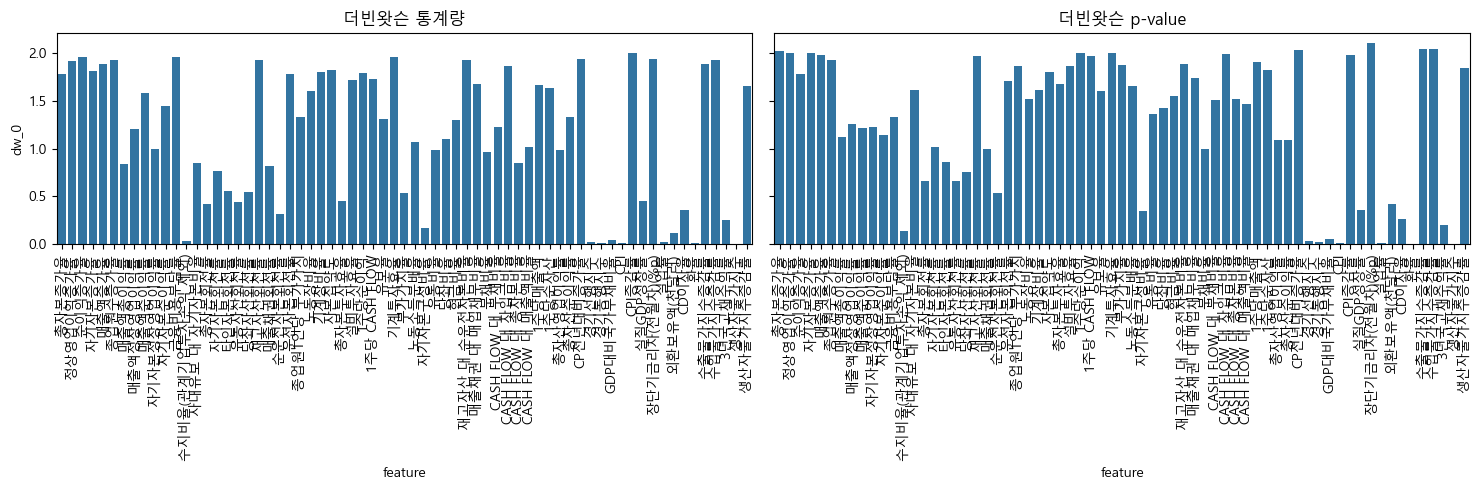

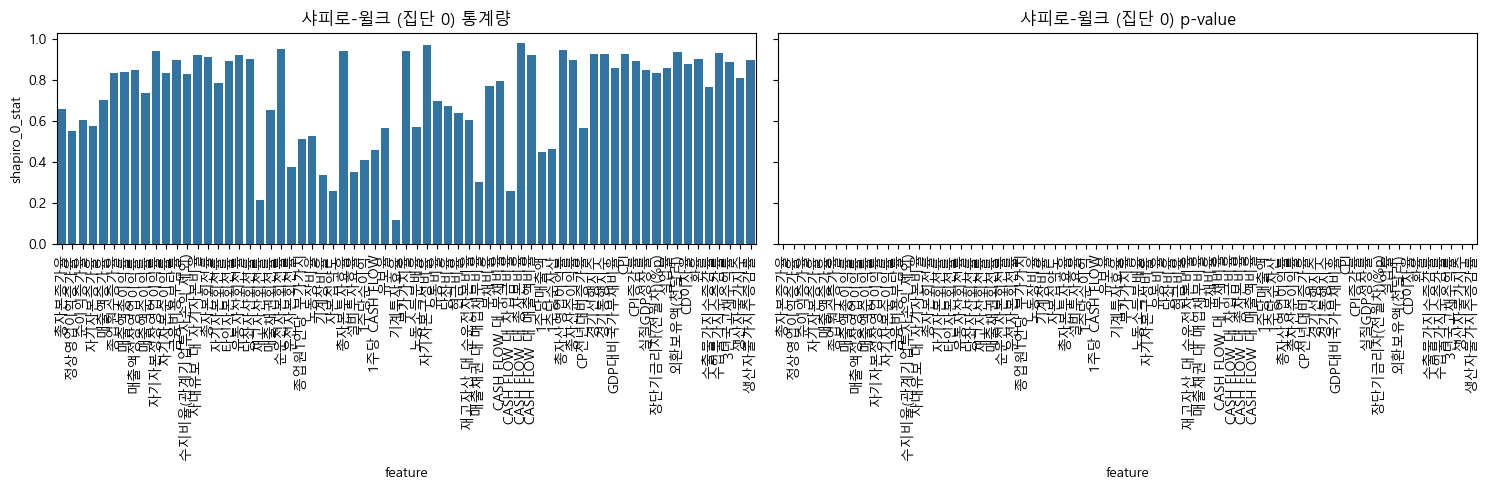

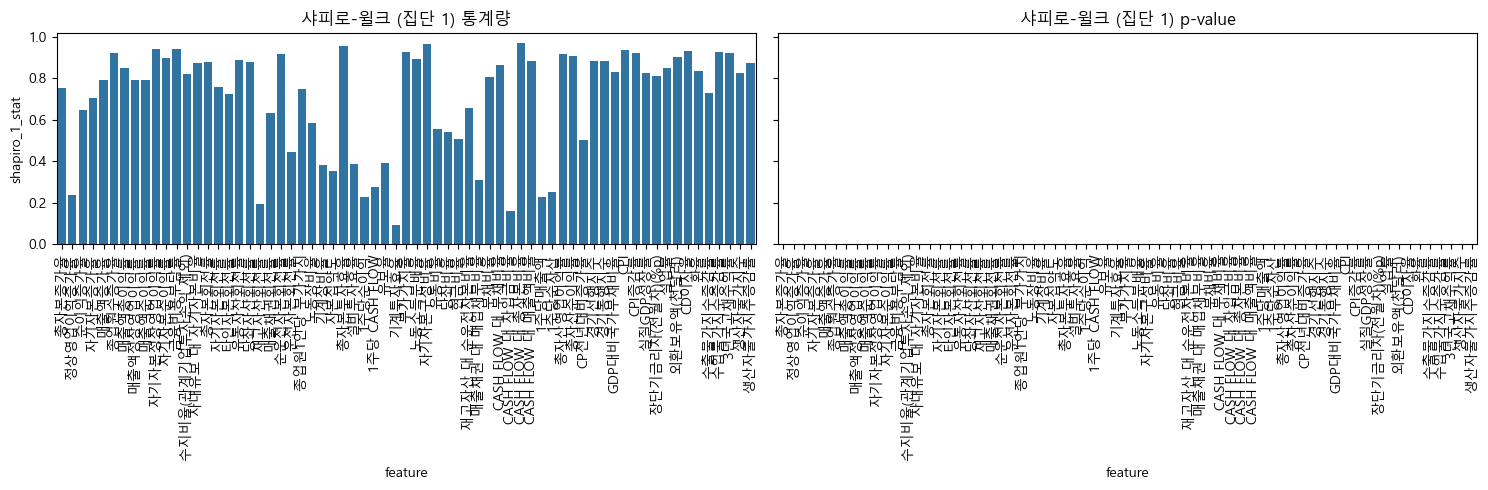

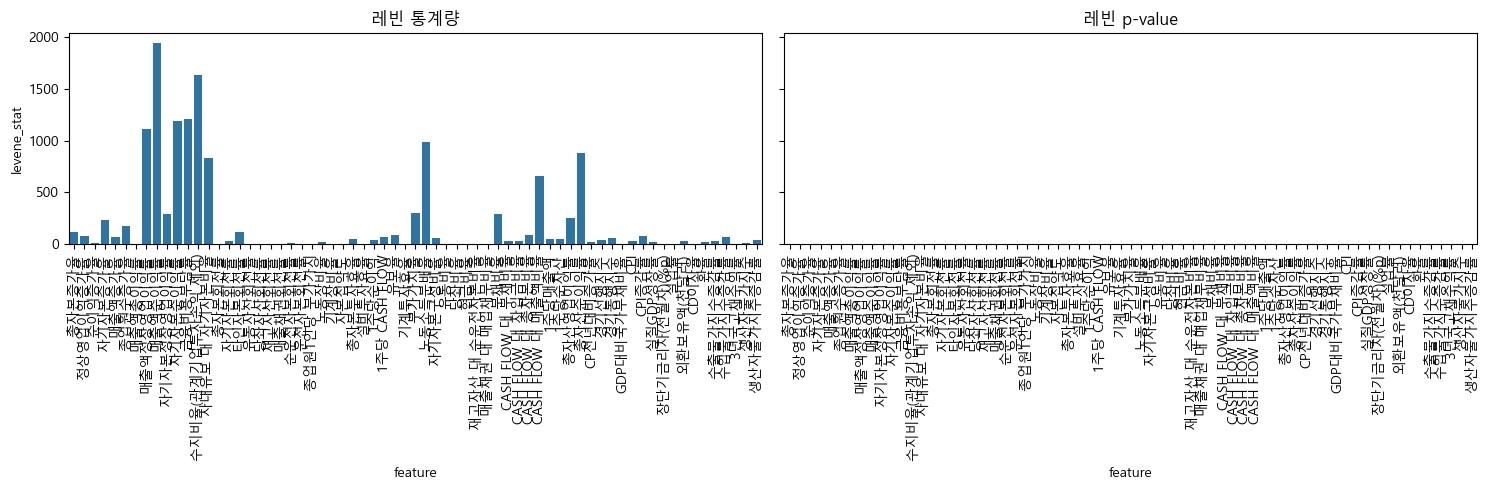

In [17]:
# 한글 폰트 및 마이너스 기호 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # Drop non-feature columns and separate features and target

# Drop non-feature columns and separate features and target
X = all_features.drop(columns=['회사명', '거래소코드', '회계년도', '부실'])
y = all_features['부실']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# '0'과 '1' 집단으로 나누기
group0_train = X_train[y_train == 0]
group1_train = X_train[y_train == 1]

# 결과 저장용 리스트
results = []

# 각 피처에 대해 테스트 수행
for feature in X_train.columns:
    dw_0 = durbin_watson(group0_train[feature])
    dw_1 = durbin_watson(group1_train[feature])
    shapiro_0 = shapiro(group0_train[feature])
    shapiro_1 = shapiro(group1_train[feature])
    levene_test = levene(group0_train[feature], group1_train[feature])
    
    results.append({
        'feature': feature,
        'dw_0': dw_0,
        'dw_1': dw_1,
        'shapiro_0_stat': shapiro_0.statistic,
        'shapiro_0_p': shapiro_0.pvalue,
        'shapiro_1_stat': shapiro_1.statistic,
        'shapiro_1_p': shapiro_1.pvalue,
        'levene_stat': levene_test.statistic,
        'levene_p': levene_test.pvalue
    })

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 시각화 함수 정의
def plot_test_results(df, test_name, stat_col, p_col):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    
    sns.barplot(x='feature', y=stat_col, data=df, ax=axes[0])
    axes[0].set_title(f'{test_name} 통계량')
    axes[0].tick_params(axis='x', rotation=90)
    
    sns.barplot(x='feature', y=p_col, data=df, ax=axes[1])
    axes[1].set_title(f'{test_name} p-value')
    axes[1].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

# 더빈왓슨 검정 시각화
plot_test_results(results_df, '더빈왓슨', 'dw_0', 'dw_1')

# 샤피로-윌크 검정 시각화 (집단 0)
plot_test_results(results_df, '샤피로-윌크 (집단 0)', 'shapiro_0_stat', 'shapiro_0_p')

# 샤피로-윌크 검정 시각화 (집단 1)
plot_test_results(results_df, '샤피로-윌크 (집단 1)', 'shapiro_1_stat', 'shapiro_1_p')

# 레빈 검정 시각화
plot_test_results(results_df, '레빈', 'levene_stat', 'levene_p')


In [18]:
from sklearn.feature_selection import f_classif
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split

# Drop non-feature columns and separate features and target
X = all_features.drop(columns=['회사명', '거래소코드', '회계년도', '부실'])
y = all_features['부실']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state = 42)

# Perform F-test for feature selection
f_test, _ = f_classif(X_train, y_train)
f_test_scores = pd.Series(f_test, index=X_train.columns)

# Separate the train data into two groups based on the target variable for T-test
group0_train = X_train[y_train == 0]
group1_train = X_train[y_train == 1]

# Perform T-test for feature selection
t_test_scores = {}
for column in X_train.columns:
    t_stat, _ = ttest_ind(group0_train[column], group1_train[column], nan_policy='omit')
    t_test_scores[column] = t_stat

t_test_scores = pd.Series(t_test_scores)
t_test_scores

총자본증가율         2.214939
정상영업이익증가율      4.295767
순이익증가율        10.936441
자기자본증가율        1.750452
매출액증가율         3.301912
                ...    
수출물가지수증감률      4.032076
수입물가지수증감률      2.159684
3년국고채수익률      -4.953167
생산자물가지수       -0.056032
생산자물가지수증감률     2.469703
Length: 67, dtype: float64

In [19]:
# Calculate p-values for t-test
p_values = {}
for column in X_train.columns:
    _, p_val = ttest_ind(group0_train[column], group1_train[column], nan_policy='omit')
    p_values[column] = p_val

p_values_series = pd.Series(p_values)
p_values_series

총자본증가율        2.679032e-02
정상영업이익증가율     1.759993e-05
순이익증가율        1.171936e-27
자기자본증가율       8.007597e-02
매출액증가율        9.641872e-04
                  ...     
수출물가지수증감률     5.576242e-05
수입물가지수증감률     3.082466e-02
3년국고채수익률      7.440216e-07
생산자물가지수       9.553178e-01
생산자물가지수증감률    1.354175e-02
Length: 67, dtype: float64

In [44]:
# p-value 값을 오름차순으로 정렬하여 순위를 구함
sorted_p_values = p_values_series.sort_values()
# 원하는 피처들의 이름 리스트
target_features = ['CASH FLOW 대 매출액비율', 'CASH FLOW 대 차입금비율', '부채비율', '유동비율', '자기자본구성비율', '재고자산 대 순운전자본비율']
# 원하는 피처들의 순위를 찾음
for feature in target_features:
    rank = sorted_p_values.index.get_loc(feature) + 1
    print(f"{feature}의 순위: {rank}/{len(sorted_p_values)}")


CASH FLOW 대 매출액비율의 순위: 2/67
CASH FLOW 대 차입금비율의 순위: 36/67
부채비율의 순위: 17/67
유동비율의 순위: 48/67
자기자본구성비율의 순위: 18/67
재고자산 대 순운전자본비율의 순위: 46/67


In [20]:
f_test_scores

총자본증가율          4.905953
정상영업이익증가율      18.453618
순이익증가율        119.605739
자기자본증가율         3.064081
매출액증가율         10.902623
                 ...    
수출물가지수증감률      16.257639
수입물가지수증감률       4.664233
3년국고채수익률       24.533863
생산자물가지수         0.003140
생산자물가지수증감률      6.099432
Length: 67, dtype: float64

In [21]:
# from sklearn.feature_selection import f_classif
# from scipy.stats import ttest_ind

# # Drop non-feature columns and separate features and target
# X = all_features.drop(columns=['회사명', '거래소코드', '회계년도', '부실'])
# y = all_features['부실']

# # Perform F-test for feature selection
# f_test, _ = f_classif(X, y)
# f_test_scores = pd.Series(f_test, index=X.columns)

# # Separate the data into two groups based on the target variable for T-test
# group0 = all_features[all_features['부실'] == 0]
# group1 = all_features[all_features['부실'] == 1]

# # Perform T-test for feature selection
# t_test_scores = {}
# for column in X.columns:
#     t_stat, _ = ttest_ind(group0[column], group1[column], nan_policy='omit')
#     t_test_scores[column] = t_stat

# t_test_scores = pd.Series(t_test_scores)

# # Display the top features based on F-test and T-test scores
# top_features_f_test = f_test_scores.nlargest(10)
# top_features_t_test = t_test_scores.nlargest(10)

# top_features_f_test, top_features_t_test

In [22]:
# # Display F-test and T-test scores for all features
# f_test_scores = f_test_scores.sort_values(ascending=False)
# t_test_scores = t_test_scores.sort_values(ascending=False)

# # Create a DataFrame to hold both scores for easy comparison
# feature_scores = pd.DataFrame({
#     'F-test Score': f_test_scores,
#     'T-test Score': t_test_scores
# })

# # Display the scores for all features
# feature_scores

# # feature_scores.to_excel('2024/ML/프로젝트2/피쳐_T-test&F-test.xlsx', index=False)

In [23]:
# from sklearn.feature_selection import f_classif
# from scipy.stats import ttest_ind

# # Drop non-feature columns and separate features and target
# X = all_features.drop(columns=['회사명', '거래소코드', '회계년도', '부실'])
# y = all_features['부실']

# # Perform F-test for feature selection
# f_test, f_p_values = f_classif(X, y)
# f_test_scores = pd.Series(f_test, index=X.columns)
# f_p_values_series = pd.Series(f_p_values, index=X.columns)

# # Separate the data into two groups based on the target variable for T-test
# group0 = all_features[all_features['부실'] == 0]
# group1 = all_features[all_features['부실'] == 1]

# # Perform T-test for feature selection
# t_test_scores = {}
# t_p_values = {}
# for column in X.columns:
#     t_stat, p_value = ttest_ind(group0[column], group1[column], nan_policy='omit')
#     t_test_scores[column] = t_stat
#     t_p_values[column] = p_value

# t_test_scores = pd.Series(t_test_scores)
# t_p_values_series = pd.Series(t_p_values)

# # Create a DataFrame to hold both scores and p-values for comparison
# feature_scores = pd.DataFrame({
#     'F-test Score': f_test_scores,
#     'F-test p-value': f_p_values_series,
#     'T-test Score': t_test_scores,
#     'T-test p-value': t_p_values_series
# })

# # Display the scores and p-values for all features
# # print(feature_scores)  # Display the first few rows of the results for verification
# feature_scores


In [38]:
num_significant_features = (p_values_series < 0.05).sum()
num_significant_features

53

In [37]:
significant_features = p_values_series[p_values_series < 0.05].index.tolist()
significant_features

['총자본증가율',
 '정상영업이익증가율',
 '순이익증가율',
 '매출액증가율',
 '종업원수증가율',
 '매출액총이익률',
 '매출액정상영업이익률',
 '매출액순이익률',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '금융비용부담률',
 '수지비율(관계기업투자손익 제외)',
 '사내유보 대 자기자본비율',
 '총자본회전률',
 '타인자본회전률',
 '유동자산회전률',
 '당좌자산회전률',
 '매출채권회전률',
 '순운전자본회전률',
 '종업원1인당 부가가치',
 '노동장비율',
 '총자본투자효율',
 '설비투자효율',
 '1주당순이익',
 '1주당 CASH FLOW',
 '유보율',
 '부가가치율',
 '노동소득분배율',
 '자기자본구성비율',
 '유동비율',
 '재고자산 대 순운전자본비율',
 '부채비율',
 'CASH FLOW 대 부채비율',
 'CASH FLOW 대 차입금비율',
 'CASH FLOW 대 총자본비율',
 'CASH FLOW 대 매출액비율',
 '1주당매출액',
 '1주당순자산',
 '총자산영업이익률',
 '총자산순이익률',
 'CP전년대비증가율',
 '경기선행지수',
 '경기동행지수',
 'GDP대비국가부채비율',
 '장단기금리차(전월차)(%p)',
 '실업률',
 '외환보유액(천달러)',
 'CD이자율',
 '환율',
 '수출물가지수증감률',
 '수입물가지수증감률',
 '3년국고채수익률',
 '생산자물가지수증감률']

In [42]:
significant_features_sorted = p_values_series[p_values_series < 0.05].sort_values()
significant_features_sorted

CASH FLOW 대 총자본비율     0.000000e+00
CASH FLOW 대 매출액비율     0.000000e+00
총자산영업이익률              0.000000e+00
매출액정상영업이익률            0.000000e+00
매출액순이익률               0.000000e+00
자기자본정상영업이익률           0.000000e+00
자기자본순이익률              0.000000e+00
수지비율(관계기업투자손익 제외)     0.000000e+00
사내유보 대 자기자본비율         0.000000e+00
총자산순이익률               0.000000e+00
총자본투자효율              5.803842e-229
금융비용부담률              1.913825e-222
부가가치율                7.224894e-204
CASH FLOW 대 부채비율     4.395805e-178
순운전자본회전률             2.147072e-117
타인자본회전률              4.236135e-103
부채비율                  1.265682e-71
자기자본구성비율              1.999830e-66
종업원1인당 부가가치           6.994569e-64
총자본회전률                2.869372e-54
유보율                   7.301156e-41
유동자산회전률               1.351212e-37
당좌자산회전률               9.428545e-29
경기동행지수                4.958454e-28
순이익증가율                1.171936e-27
외환보유액(천달러)            3.461594e-27
경기선행지수                5.611957e-26
1주당 CASH FLOW         5.684052e-26
종업원수증가율             

In [43]:
significant_features_sorted_list = list(significant_features_sorted.index)
significant_features_sorted_list

['CASH FLOW 대 총자본비율',
 'CASH FLOW 대 매출액비율',
 '총자산영업이익률',
 '매출액정상영업이익률',
 '매출액순이익률',
 '자기자본정상영업이익률',
 '자기자본순이익률',
 '수지비율(관계기업투자손익 제외)',
 '사내유보 대 자기자본비율',
 '총자산순이익률',
 '총자본투자효율',
 '금융비용부담률',
 '부가가치율',
 'CASH FLOW 대 부채비율',
 '순운전자본회전률',
 '타인자본회전률',
 '부채비율',
 '자기자본구성비율',
 '종업원1인당 부가가치',
 '총자본회전률',
 '유보율',
 '유동자산회전률',
 '당좌자산회전률',
 '경기동행지수',
 '순이익증가율',
 '외환보유액(천달러)',
 '경기선행지수',
 '1주당 CASH FLOW',
 '종업원수증가율',
 'GDP대비국가부채비율',
 '1주당순자산',
 '1주당순이익',
 '1주당매출액',
 '설비투자효율',
 '환율',
 'CASH FLOW 대 차입금비율',
 '매출액총이익률',
 '실업률',
 '노동소득분배율',
 'CD이자율',
 '3년국고채수익률',
 '노동장비율',
 '장단기금리차(전월차)(%p)',
 '정상영업이익증가율',
 '수출물가지수증감률',
 '재고자산 대 순운전자본비율',
 '매출액증가율',
 '유동비율',
 '생산자물가지수증감률',
 'CP전년대비증가율',
 '총자본증가율',
 '수입물가지수증감률',
 '매출채권회전률']

In [41]:
# significant_features_sorted_list에 있는 유의한 피처의 순위 출력
for rank, feature in enumerate(significant_features_sorted_list, start=1):
    print(f"{rank}: {feature}")

1: CASH FLOW 대 총자본비율
2: CASH FLOW 대 매출액비율
3: 총자산영업이익률
4: 매출액정상영업이익률
5: 매출액순이익률
6: 자기자본정상영업이익률
7: 자기자본순이익률
8: 수지비율(관계기업투자손익 제외)
9: 사내유보 대 자기자본비율
10: 총자산순이익률
11: 총자본투자효율
12: 금융비용부담률
13: 부가가치율
14: CASH FLOW 대 부채비율
15: 순운전자본회전률
16: 타인자본회전률
17: 부채비율
18: 자기자본구성비율
19: 종업원1인당 부가가치
20: 총자본회전률
21: 유보율
22: 유동자산회전률
23: 당좌자산회전률
24: 경기동행지수
25: 순이익증가율
26: 외환보유액(천달러)
27: 경기선행지수
28: 1주당 CASH FLOW
29: 종업원수증가율
30: GDP대비국가부채비율
31: 1주당순자산
32: 1주당순이익
33: 1주당매출액
34: 설비투자효율
35: 환율
36: CASH FLOW 대 차입금비율
37: 매출액총이익률
38: 실업률
39: 노동소득분배율
40: CD이자율
41: 3년국고채수익률
42: 노동장비율
43: 장단기금리차(전월차)(%p)
44: 정상영업이익증가율
45: 수출물가지수증감률
46: 재고자산 대 순운전자본비율
47: 매출액증가율
48: 유동비율
49: 생산자물가지수증감률
50: CP전년대비증가율
51: 총자본증가율
52: 수입물가지수증감률
53: 매출채권회전률


In [ ]:
# <성장성>
dff = df[[
 '매출액증가율',
'순이익증가율',
'정상영업이익증가율',
'종업원수증가율']]